In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [ ]:
style.use('ggplot')

In [ ]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
             [8,8],
             [1,0.6],
             [9,11],])

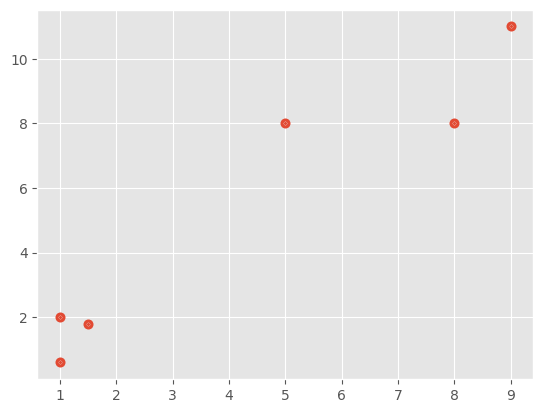

In [ ]:
plt.scatter(X[:,0],X[:,1], s=5, linewidths=5)
plt.show()

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [ ]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [ ]:
colors = ['g.','r.','c.','b.','k.','o.']

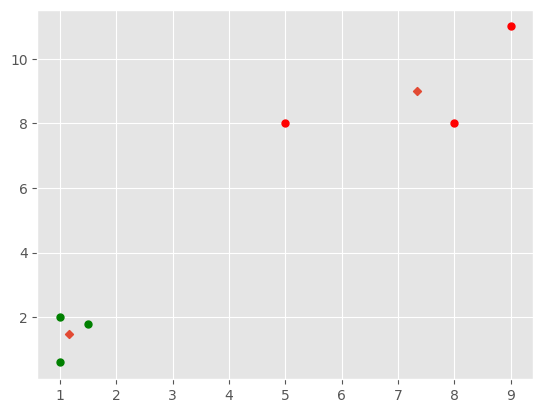

In [ ]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x',s=10,linewidths=5)
plt.show()

# Datos no numéricos

In [ ]:
df = pd.read_excel('titanic.xls')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.drop(['body','name'], axis = 1, inplace=True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
def handle_non_numerical_data(df):
  columns = df.columns.values

  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]
    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
      column_contents=df[column].values.tolist()
      unique_elements=set(column_contents)
      x=0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1
      df[column]=list(map(convert_to_int,df[column]))
  return df

In [ ]:
df = handle_non_numerical_data(df)
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,744,211.3375,184,2,1,247
1,1,1,0,0.9167,1,2,515,151.5500,65,2,2,322
2,1,0,1,2.0000,1,2,515,151.5500,65,2,0,322
3,1,0,0,30.0000,1,2,515,151.5500,65,2,0,322
4,1,0,1,25.0000,1,2,515,151.5500,65,2,0,322
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,14.5000,1,0,714,14.4542,0,1,0,0
1305,3,0,1,0.0000,1,0,714,14.4542,0,1,0,0
1306,3,0,0,26.5000,0,0,740,7.2250,0,1,0,0
1307,3,0,0,27.0000,0,0,187,7.2250,0,1,0,0


In [ ]:
# df.drop(['ticket'], axis = 1, inplace=True)

In [ ]:
X = np.array(df.drop(['survived'], axis = 1).astype(float))

In [ ]:
X = preprocessing.scale(X)

In [ ]:
y = np.array(df['survived'])

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [ ]:
correct = 0

In [ ]:
for i in range(len(X)):
  predict_me=np.array(X[i].astype(float))
  predict_me=predict_me.reshape(-1,len(predict_me))
  prediction = clf.predict(predict_me)
  if prediction[0] == y[i]:
    correct+=1

In [ ]:
print(correct/len(X))

0.7249809014514896


# Crear mi K-means

In [ ]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
             [8,8],
             [1,0.6],
             [9,11],])

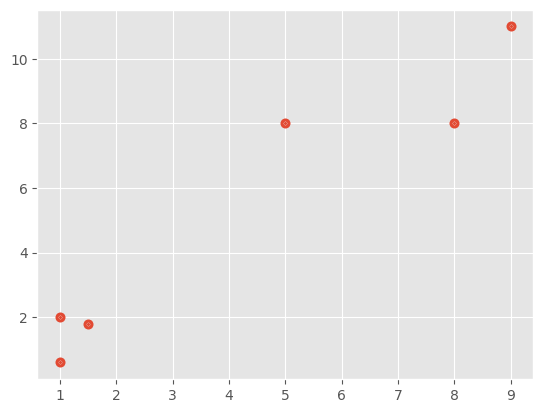

In [ ]:
plt.scatter(X[:,0],X[:,1], s=5, linewidths=5)
plt.show()

In [ ]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [ ]:
colors = ['g.','r.','c.','b.','k.']

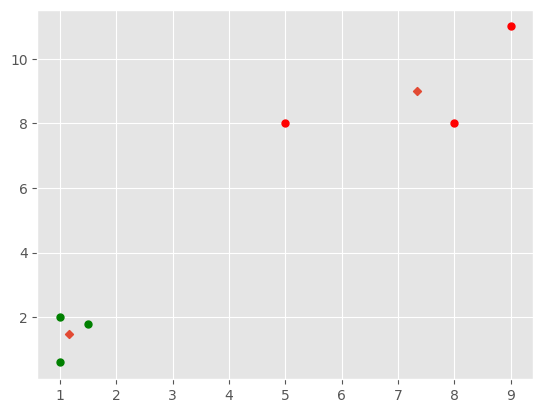

In [ ]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x',s=10,linewidths=5)
plt.show()

In [ ]:
class K_Means:
  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self,data):
    self.centroids = {}

      for i in range(self.k):
        self.centroids[i]=data[i]
      for i in range

    #CONTINUA DEL FOR
  def predict(self,data):
    pass